<a href="https://colab.research.google.com/github/Carlos-Biologist/Modulo_III_Video_aula_5_Pratica_DL_e_RNA/blob/main/M%C3%B3dulo_III_V%C3%ADdeo_aula_5_Pr%C3%A1tica_Depp_Learning_e_Redes_Neurais_Artificiais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **-> Histopathologic Oral Cancer Detection - Oral Squamous Cell Carcinoma (OSCC)**
### **2 classes**
### *   Com OSCC
### *   Sem OSCC

### **-> COVID-19 Radiography Database**
### **4 classes**

### *   Normal
### *   Opacidade Pulmonar
### *   Pneumonia viral
### *   COVID-19

### **-> Rede Neural Artificial**
### **-> Rede Neural Convolucional**


###**O Oral Squamous Cell Carcinoma (OSCC)** é o carcinoma de células escamosas da cavidade oral, um tipo de câncer maligno que se origina nos queratinócitos (células escamosas) presentes no epitélio da boca. É o tipo mais comum de câncer oral, representando cerca de 90% de todos os tumores malignos da cavidade oral.


In [ ]:
import os
import numpy as np
import kagglehub
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("TensorFlow:", tf.__version__)

TensorFlow: 2.19.0


In [ ]:
# ==============================================================
# 1. Baixar Dataset
# ==============================================================

path = kagglehub.dataset_download("ashenafifasilkebede/dataset")
print("📁 Caminho do dataset:", path)

train_dir = os.path.join(path, "train")
valid_dir = os.path.join(path, "val")
test_dir  = os.path.join(path, "test")


100%|██████████| 2.93G/2.93G [00:34<00:00, 90.1MB/s]

Extracting files...


📁 Caminho do dataset: /root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1


In [ ]:
# ==============================================================
# 2. Contar imagens por classe
# ==============================================================

def contar_imagens(base_path):
    print(f"\n📂 Diretório: {base_path}")

    total = 0

    # Verifica se a pasta existe
    if not os.path.exists(base_path):
        print("❌ Pasta não encontrada.")
        return

    # Lista classes (subpastas)
    classes = sorted(os.listdir(base_path))

    for classe in classes:
        classe_path = os.path.join(base_path, classe)

        if os.path.isdir(classe_path):
            # Conta arquivos de imagem
            imagens = [
                f for f in os.listdir(classe_path)
                if f.lower().endswith((".png", ".jpg", ".jpeg"))
            ]
            print(f"  📸 Classe '{classe}': {len(imagens)} imagens")
            total += len(imagens)

    print(f"📊 TOTAL no diretório '{os.path.basename(base_path)}': {total} imagens")


# ==============================================================
# Executar contagens
# ==============================================================

contar_imagens(train_dir)
contar_imagens(valid_dir)
contar_imagens(test_dir)


📂 Diretório: /root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1/train
  📸 Classe 'Normal': 2435 imagens
  📸 Classe 'OSCC': 2511 imagens
📊 TOTAL no diretório 'train': 4946 imagens

📂 Diretório: /root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1/val
  📸 Classe 'Normal': 28 imagens
  📸 Classe 'OSCC': 92 imagens
📊 TOTAL no diretório 'val': 120 imagens

📂 Diretório: /root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1/test
  📸 Classe 'Normal': 31 imagens
  📸 Classe 'OSCC': 95 imagens
📊 TOTAL no diretório 'test': 126 imagens


In [ ]:
# ==============================================================
# 3. Visualizar tamanho das imagens
# ==============================================================

from PIL import Image

def mostrar_tamanhos(diretorio):
    print(f"\n📂 Diretório: {diretorio}\n")

    for classe in sorted(os.listdir(diretorio)):
        classe_path = os.path.join(diretorio, classe)

        if os.path.isdir(classe_path):
            print(f"📌 Classe: {classe}")

            for img_name in os.listdir(classe_path):
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img_path = os.path.join(classe_path, img_name)
                    img = Image.open(img_path)
                    print(f"  - {img_name}: {img.size}  (Largura x Altura)")

mostrar_tamanhos(train_dir)
mostrar_tamanhos(valid_dir)
mostrar_tamanhos(test_dir)

A saída de streaming foi truncada nas últimas 5000 linhas.
  - aug_313_1352.jpg: (224, 224)  (Largura x Altura)
  - aug_43_6197.jpg: (224, 224)  (Largura x Altura)
  - aug_109_7018.jpg: (224, 224)  (Largura x Altura)
  - aug_193_1977.jpg: (224, 224)  (Largura x Altura)
  - aug_816_7839.jpg: (224, 224)  (Largura x Altura)
  - aug_76_2396.jpg: (224, 224)  (Largura x Altura)
  - aug_100_1178.jpg: (224, 224)  (Largura x Altura)
  - aug_10_9029.jpg: (224, 224)  (Largura x Altura)
  - Normal_400x_166.jpg: (2048, 1536)  (Largura x Altura)
  - aug_112_4635.jpg: (224, 224)  (Largura x Altura)
  - aug_373_1944.jpg: (224, 224)  (Largura x Altura)
  - aug_278_1086.jpg: (224, 224)  (Largura x Altura)
  - aug_385_2689.jpg: (224, 224)  (Largura x Altura)
  - aug_143_575.jpg: (224, 224)  (Largura x Altura)
  - aug_257_3201.jpg: (224, 224)  (Largura x Altura)
  - aug_415_111.jpg: (224, 224)  (Largura x Altura)
  - aug_168_9109.jpg: (224, 224)  (Largura x Altura)
  - Normal_100x_29.jpg: (2048, 1536)  (L

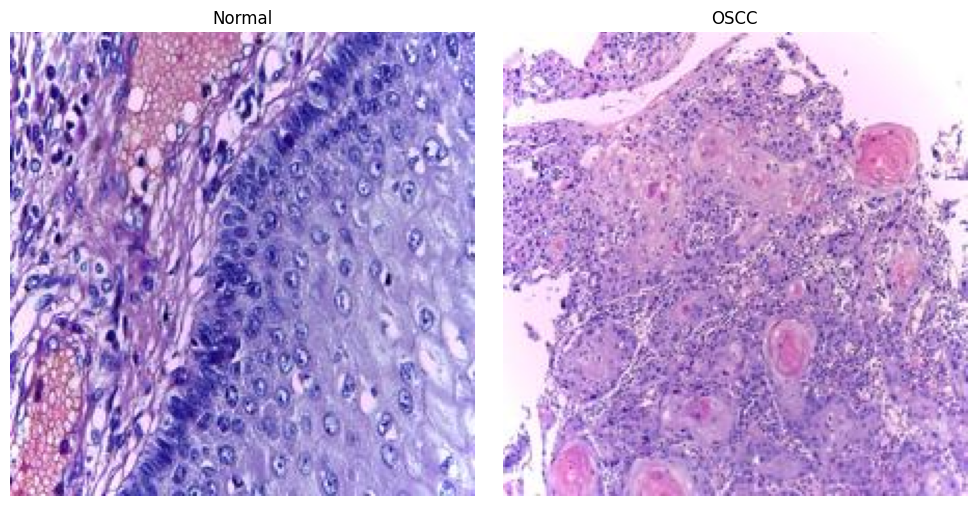

In [ ]:
# ==============================================================
# 4. Visualizar uma imagem aleatória de cada classe do treino
# ==============================================================

import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def mostrar_imagens_aleatorias(train_dir):

    # Lista das classes (subpastas)
    classes = sorted(os.listdir(train_dir))
    num_classes = len(classes)

    plt.figure(figsize=(5 * num_classes, 5))

    for idx, classe in enumerate(classes):
        classe_path = os.path.join(train_dir, classe)

        # Apenas arquivos de imagem
        imagens = [
            f for f in os.listdir(classe_path)
            if f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ]

        if len(imagens) == 0:
            print(f"⚠️ Nenhuma imagem encontrada na classe '{classe}'.")
            continue

        # Escolher uma imagem aleatória
        img_name = random.choice(imagens)
        img_path = os.path.join(classe_path, img_name)

        # Carregar imagem
        img = mpimg.imread(img_path)

        # Plotar
        plt.subplot(1, num_classes, idx + 1)
        plt.imshow(img)
        plt.title(classe)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


# Chamar função
mostrar_imagens_aleatorias(train_dir)

In [ ]:
# ==============================================================
# 5. Unir todos os diretórios em um único (dataset_unico)
# ==============================================================

import shutil

unico_dir = os.path.join(path, "dataset_unico")
os.makedirs(unico_dir, exist_ok=True)

classes = ["Normal", "OSCC"]

for classe in classes:
    # cria as pastas Normal/ e OSCC/
    destino_classe = os.path.join(unico_dir, classe)
    os.makedirs(destino_classe, exist_ok=True)

    # lista os diretórios de origem
    origens = [train_dir, valid_dir, test_dir]

    for origem in origens:
        origem_classe = os.path.join(origem, classe)

        if not os.path.exists(origem_classe):
            continue

        for img in os.listdir(origem_classe):
            if img.lower().endswith((".png", ".jpg", ".jpeg")):

                origem_img = os.path.join(origem_classe, img)
                destino_img = os.path.join(destino_classe, img)

                # Se já existir, renomeia
                if os.path.exists(destino_img):
                    nome, ext = os.path.splitext(img)
                    contador = 1
                    while True:
                        novo_nome = f"{nome}_{contador}{ext}"
                        destino_img = os.path.join(destino_classe, novo_nome)
                        if not os.path.exists(destino_img):
                            break
                        contador += 1

                shutil.copy2(origem_img, destino_img)

print("🎉 Diretórios unidos com sucesso!")
print("📁 Novo diretório:", unico_dir)

🎉 Diretórios unidos com sucesso!
📁 Novo diretório: /root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1/dataset_unico


In [ ]:
# ==============================================================
# 6. Contar imagens
# ==============================================================

# Caminho do diretório unificado
unico_dir = os.path.join(path, "dataset_unico")

def contar_por_classe(base_path):
    print(f"\n📁 Verificando diretório: {base_path}")

    if not os.path.exists(base_path):
        print("❌ Diretório não encontrado!")
        return

    classes = sorted(os.listdir(base_path))

    total = 0
    for classe in classes:
        classe_path = os.path.join(base_path, classe)

        if os.path.isdir(classe_path):
            imagens = [
                f for f in os.listdir(classe_path)
                if f.lower().endswith((".png", ".jpg", ".jpeg"))
            ]
            print(f"  📸 Classe '{classe}': {len(imagens)} imagens")
            total += len(imagens)

    print(f"📊 TOTAL de imagens no dataset_unico: {total}")

# Executa a contagem
contar_por_classe(unico_dir)


📁 Verificando diretório: /root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1/dataset_unico
  📸 Classe 'Normal': 2494 imagens
  📸 Classe 'OSCC': 2698 imagens
📊 TOTAL de imagens no dataset_unico: 5192


In [ ]:
# ==============================================================
# 7. Divisão estratificada 70/10/20 (train/val/test)
# ==============================================================

import random
import shutil

# Caminho para o dataset unificado
unico_dir = os.path.join(path, "dataset_unico")

# Novo diretório onde será salva a divisão
split_dir = os.path.join(path, "dataset_split")
os.makedirs(split_dir, exist_ok=True)

# Proporções desejadas
train_ratio = 0.7
val_ratio   = 0.1
test_ratio  = 0.2

classes = ["Normal", "OSCC"]

for classe in classes:
    origem_classe = os.path.join(unico_dir, classe)

    # Criar diretórios destino
    for subset in ["train", "val", "test"]:
        destino = os.path.join(split_dir, subset, classe)
        os.makedirs(destino, exist_ok=True)

    # Listar imagens
    imagens = [
        f for f in os.listdir(origem_classe)
        if f.lower().endswith((".png", ".jpg", ".jpeg"))
    ]

    # Embaralhar
    random.shuffle(imagens)

    total = len(imagens)
    n_train = int(total * train_ratio)
    n_val   = int(total * val_ratio)
    n_test  = total - n_train - n_val  # garante que fecha 100%

    # Divisões estratificadas
    train_imgs = imagens[:n_train]
    val_imgs   = imagens[n_train:n_train+n_val]
    test_imgs  = imagens[n_train+n_val:]

    print(f"\n📂 Classe: {classe}")
    print(f"  Total: {total}")
    print(f"  Treino (70%): {len(train_imgs)}")
    print(f"  Val (10%): {len(val_imgs)}")
    print(f"  Teste (20%): {len(test_imgs)}")

    # Copiar os arquivos
    def copiar(lista, subset):
        for img in lista:
            origem_img = os.path.join(origem_classe, img)
            destino_img = os.path.join(split_dir, subset, classe, img)

            # Se já existir, renomeia
            if os.path.exists(destino_img):
                nome, ext = os.path.splitext(img)
                count = 1
                while True:
                    novo_nome = f"{nome}_{count}{ext}"
                    destino_img = os.path.join(split_dir, subset, classe, novo_nome)
                    if not os.path.exists(destino_img):
                        break
                    count += 1

            shutil.copy2(origem_img, destino_img)

    copiar(train_imgs, "train")
    copiar(val_imgs, "val")
    copiar(test_imgs, "test")

print("\n🎉 Divisão 70/10/20 concluída com sucesso!")
print("📁 Novo dataset dividido em:", split_dir)


📂 Classe: Normal
  Total: 2494
  Treino (70%): 1745
  Val (10%): 249
  Teste (20%): 500

📂 Classe: OSCC
  Total: 2698
  Treino (70%): 1888
  Val (10%): 269
  Teste (20%): 541

🎉 Divisão 70/10/20 concluída com sucesso!
📁 Novo dataset dividido em: /root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1/dataset_split


In [ ]:
# ==============================================================
# 8. Definir parâmetros
# ==============================================================

base_dir = os.path.join(path, "dataset_split")

train_dir = os.path.join(base_dir, "train")
val_dir   = os.path.join(base_dir, "val")
test_dir  = os.path.join(base_dir, "test")

img_height = 224
img_width = 224
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_gen_oscc = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="binary",
    shuffle=True
)

val_gen_oscc = datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="binary",
    shuffle=True
)

Found 3633 images belonging to 2 classes.
Found 518 images belonging to 2 classes.


In [ ]:
# ==============================================================
# 9. Criar arquitetura da Rede Neural Artificial (MLP)
# ==============================================================

from tensorflow.keras import layers, models

model_oscc = models.Sequential([
    layers.Flatten(input_shape=(img_height, img_width, 3)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_oscc.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_oscc.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    38,535,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,568,449 (147.13 MB)

 Trainable params: 38,568,449 (147.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ==============================================================
# 10. Treinar modelo
# ==============================================================

history_oscc = model_oscc.fit(
    train_gen_oscc,
    validation_data=val_gen_oscc,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 67s 565ms/step - accuracy: 0.5126 - loss: 17.4600 - val_accuracy: 0.5193 - val_loss: 2.2709
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 57s 502ms/step - accuracy: 0.5077 - loss: 2.5032 - val_accuracy: 0.5753 - val_loss: 0.7671
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 51s 449ms/step - accuracy: 0.5550 - loss: 0.9033 - val_accuracy: 0.5579 - val_loss: 0.7386
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 51s 442ms/step - accuracy: 0.5531 - loss: 0.8315 - val_accuracy: 0.6332 - val_loss: 0.6421
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 51s 450ms/step - accuracy: 0.5588 - loss: 0.7809 - val_accuracy: 0.5193 - val_loss: 1.1381
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 50s 441ms/step - accuracy: 0.5884 - loss: 0.7587 - val_accuracy: 0.4846 - val_loss: 0.8232
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 50s 437ms/step - accuracy: 0.5632 - loss: 0.7424 - val_accuracy: 0.5058 - val_loss: 0.8301
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 51s 447ms/step - accuracy: 0.5467 - loss: 

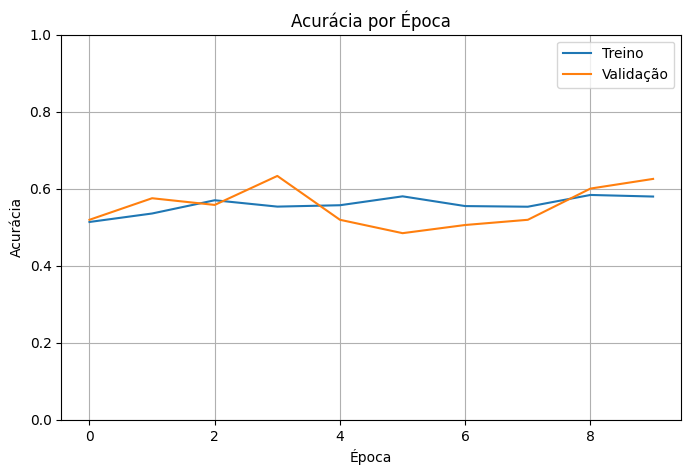

In [ ]:
# ==============================================================
# 11. Verificar Overfitting — acurácia treino vs validação
# ==============================================================

plt.figure(figsize=(8,5))
plt.plot(history_oscc.history['accuracy'], label='Treino')
plt.plot(history_oscc.history['val_accuracy'], label='Validação')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.ylim(0, 1)  # <<< AQUI define a escala do eixo Y de 0 a 1
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# ==============================================================
# 13. Avaliar o modelo no conjunto de TESTE
# ==============================================================

test_gen_oscc = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

y_true_test_oscc = test_gen_oscc.classes
y_pred_test_oscc = model_oscc.predict(test_gen_oscc)
y_pred_test_oscc = (y_pred_test_oscc > 0.5).astype(int).flatten()

acc_test_oscc = accuracy_score(y_true_test_oscc, y_pred_test_oscc)
print("📌 Acurácia no conjunto de TESTE:", acc_test_oscc)

Found 1041 images belonging to 2 classes.
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 413ms/step
📌 Acurácia no conjunto de TESTE: 0.5917387127761767


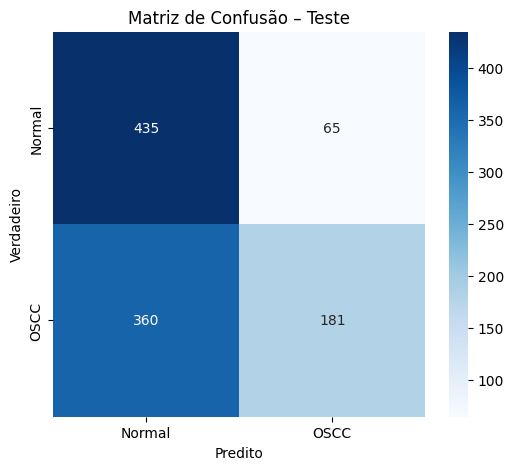

In [ ]:
# ==============================================================
# 13. Matriz de confusão
# ==============================================================

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true_test_oscc, y_pred_test_oscc)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'OSCC'],
            yticklabels=['Normal', 'OSCC'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão – Teste')
plt.show()

### **COVID-19 Radiography Database**

In [ ]:
# ==========================================================
# 1. Baixar dados
# ==========================================================

import kagglehub
import os
from collections import defaultdict

# Download da versão mais recente
path = kagglehub.dataset_download("tawsifurrahman/covid19-radiography-database")
print("✅ Dataset baixado com sucesso!")
print("📁 Caminho local:", path)

Using Colab cache for faster access to the 'covid19-radiography-database' dataset.
✅ Dataset baixado com sucesso!
📁 Caminho local: /kaggle/input/covid19-radiography-database


In [ ]:
# ==========================================================
# 2. Detectar o diretório base (onde estão as pastas das classes)
# ==========================================================

from collections import defaultdict

# Caminho base no ambiente Kaggle
base_dir = "/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset"

# Conferir estrutura principal
print("📂 Subpastas encontradas:", os.listdir(base_dir))

📂 Subpastas encontradas: ['Lung_Opacity.metadata.xlsx', 'Normal.metadata.xlsx', 'README.md.txt', 'COVID.metadata.xlsx', 'Normal', 'Lung_Opacity', 'Viral Pneumonia.metadata.xlsx', 'Viral Pneumonia', 'COVID']


In [ ]:
# ==========================================================
# 3. Contar número de imagens
# ==========================================================

# Dicionário para contagem
image_counts = defaultdict(int)

# Percorrer classes e contar imagens na subpasta 'images'
for cls in os.listdir(base_dir):
    class_path = os.path.join(base_dir, cls, "images")
    if os.path.exists(class_path):
        count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        image_counts[cls] = count

# Mostrar resultados
print("\n📊 Contagem de imagens por classe:")
for cls, count in image_counts.items():
    print(f"   {cls:<20} → {count} imagens")


📊 Contagem de imagens por classe:
   Normal               → 10192 imagens
   Lung_Opacity         → 6012 imagens
   Viral Pneumonia      → 1345 imagens
   COVID                → 3616 imagens


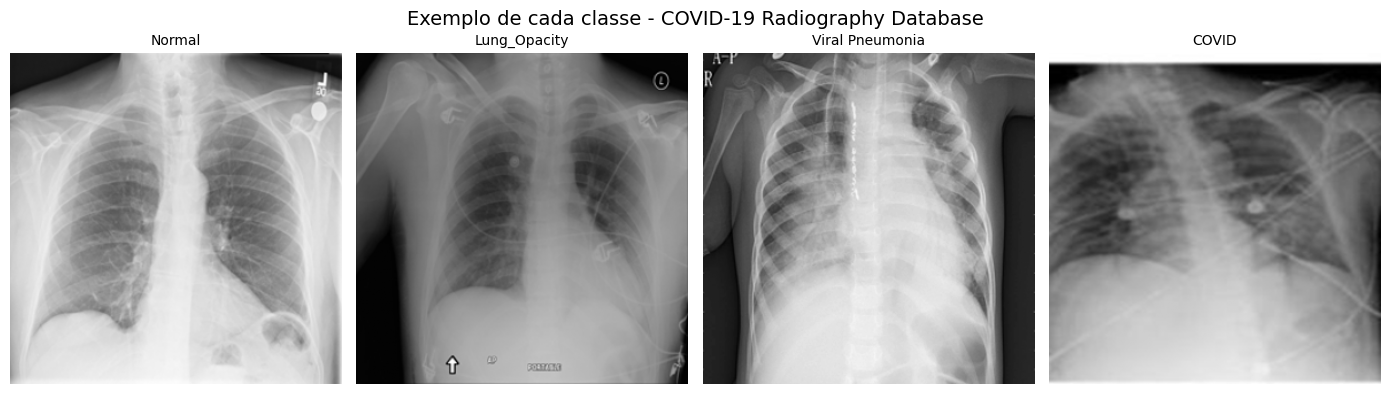

In [ ]:
# ==========================================================
# 4. Plotar uma imagem de cada classes
# ==========================================================

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

# Caminho base no ambiente Kaggle
base_dir = "/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset"

# Classes
classes = ["Normal", "Lung_Opacity", "Viral Pneumonia", "COVID"]

# Criar figura
fig, axs = plt.subplots(1, 4, figsize=(14, 4))

for i, cls in enumerate(classes):
    img_dir = os.path.join(base_dir, cls, "images")
    img_file = random.choice(os.listdir(img_dir))
    img_path = os.path.join(img_dir, img_file)

    img = mpimg.imread(img_path)
    axs[i].imshow(img, cmap="gray")
    axs[i].set_title(cls, fontsize=10)
    axs[i].axis("off")

plt.suptitle("Exemplo de cada classe - COVID-19 Radiography Database", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# ==========================================================
# 5. Construir um dataframe
# ==========================================================

import pandas as pd

# Criar listas
file_paths = []
labels = []

# Carregar caminhos e rótulos
for cls in classes:
    img_dir = os.path.join(base_dir, cls, "images")
    for f in os.listdir(img_dir):
        if f.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_paths.append(os.path.join(img_dir, f))
            labels.append(cls)

# Criar DataFrame
df = pd.DataFrame({"filepath": file_paths, "label": labels})

print("📊 Número total de imagens:", len(df))
df.head()

📊 Número total de imagens: 21165


,filepath,label
0,/kaggle/input/covid19-radiography-database/COV...,Normal
1,/kaggle/input/covid19-radiography-database/COV...,Normal
2,/kaggle/input/covid19-radiography-database/COV...,Normal
3,/kaggle/input/covid19-radiography-database/COV...,Normal
4,/kaggle/input/covid19-radiography-database/COV...,Normal


### **Dividir 70% treino / 30% teste com balanceamento (stratified split)**

In [ ]:
import os
import random
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df,
    test_size=0.30,
    random_state=42,
    stratify=df["label"]
)

print("📈 Treino:", len(train_df))
print("📉 Teste :", len(test_df))

print("\nDistribuição no Treino:")
print(train_df["label"].value_counts())

print("\nDistribuição no Teste:")
print(test_df["label"].value_counts())

📈 Treino: 14815
📉 Teste : 6350

Distribuição no Treino:
label
Normal             7134
Lung_Opacity       4208
COVID              2531
Viral Pneumonia     942
Name: count, dtype: int64

Distribuição no Teste:
label
Normal             3058
Lung_Opacity       1804
COVID              1085
Viral Pneumonia     403
Name: count, dtype: int64


### **Rede Neural Artificial**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224

train_datagen = ImageDataGenerator(
    rescale=1/255.,
)

test_datagen = ImageDataGenerator(
    rescale=1/255.,
)

train_gen = train_datagen.flow_from_dataframe(
    train_df,
    x_col="filepath",
    y_col="label",
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode="categorical",
    shuffle=True,
    batch_size=32
)

test_gen = test_datagen.flow_from_dataframe(
    test_df,
    x_col="filepath",
    y_col="label",
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode="categorical",
    shuffle=False,
    batch_size=32
)

Found 14815 validated image filenames belonging to 4 classes.
Found 6350 validated image filenames belonging to 4 classes.


In [ ]:
from tensorflow.keras import models, layers

model_ann = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes
])

In [ ]:
model_ann.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    38,535,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,568,836 (147.13 MB)

 Trainable params: 38,568,836 (147.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_ann = model_ann.fit(
    train_gen,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 115s 242ms/step - accuracy: 0.5218 - loss: 9.9002
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 46s 100ms/step - accuracy: 0.6755 - loss: 0.9155
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 44s 95ms/step - accuracy: 0.6998 - loss: 0.7645
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 81s 94ms/step - accuracy: 0.7090 - loss: 0.7398
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.7067 - loss: 0.7410
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 44s 95ms/step - accuracy: 0.7218 - loss: 0.7016
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 43s 93ms/step - accuracy: 0.7311 - loss: 0.6782
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 45s 96ms/step - accuracy: 0.7231 - loss: 0.7117
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.7425 - loss: 0.6688
Epoch 10/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 44s 95ms/step - accuracy: 0.7299 - loss: 0.6878


In [ ]:
test_loss_ann, test_acc_ann = model_ann.evaluate(test_gen)
print("\n🎯 Acurácia no conjunto de teste:", test_acc_ann)

199/199 ━━━━━━━━━━━━━━━━━━━━ 46s 231ms/step - accuracy: 0.6992 - loss: 0.7540

🎯 Acurácia no conjunto de teste: 0.6949606537818909


### **Matriz de Confusão + Curva ROC**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# ------- PREDIÇÕES ANN -------
y_prob_ann = model_ann.predict(test_gen)         # Probabilidades
y_pred_ann = np.argmax(y_prob_ann, axis=1)       # Classe prevista
y_true_ann = test_gen.classes                    # Classe verdadeira

class_names_ann = list(test_gen.class_indices.keys())

# ------- BINARIZAÇÃO DAS CLASSES -------
y_true_bin_ann = label_binarize(y_true_ann, classes=range(len(class_names_ann)))

# ------- CÁLCULO DAS CURVAS -------
spec_ann = {}   # especificidade = 1 - FPR
tpr_ann = {}
roc_auc_ann = {}

for i in range(len(class_names_ann)):
    fpr_ann_i, tpr_ann_i, _ = roc_curve(y_true_bin_ann[:, i], y_prob_ann[:, i])
    spec_ann[i] = 1 - fpr_ann_i                      # Especificidade
    tpr_ann[i]  = tpr_ann_i                          # Sensibilidade
    roc_auc_ann[i] = auc(fpr_ann_i, tpr_ann_i)

199/199 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step


### **Matriz de Confusão (ANN)**

<Figure size 700x500 with 0 Axes>

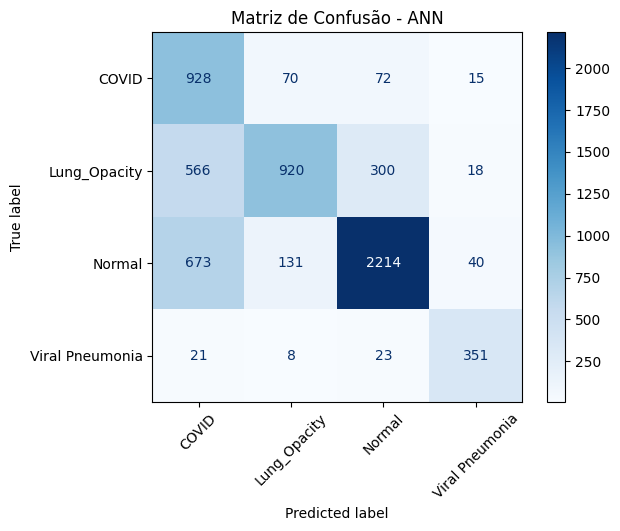

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true_ann, y_pred_ann)

plt.figure(figsize=(7,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_ann)
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusão - ANN")
plt.xticks(rotation=45)
plt.show()

### **Curvas ROC Multiclasse (ANN)**

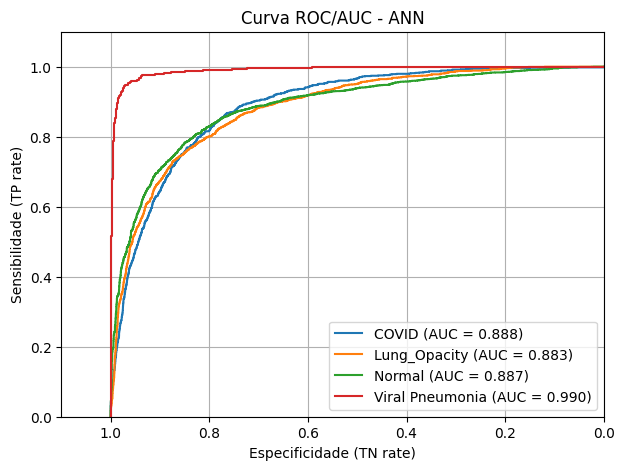

In [ ]:
plt.figure(figsize=(7,5))

for i in range(len(class_names_ann)):
    plt.plot(spec_ann[i], tpr_ann[i], label=f"{class_names_ann[i]} (AUC = {roc_auc_ann[i]:.3f})")

plt.xlabel("Especificidade (TN rate)")
plt.ylabel("Sensibilidade (TP rate)")
plt.title("Curva ROC/AUC - ANN")
plt.legend()
plt.grid(True)

plt.gca().invert_xaxis()
plt.xlim([1.1, 0])
plt.ylim([0, 1.1])

plt.show()

### **Rede Neural Convolucional**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

IMG_SIZE = 224

# Modelo simples CNN
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,817,028 (98.48 MB)

 Trainable params: 25,817,028 (98.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_gen,
    epochs=5
)

Epoch 1/5
463/463 ━━━━━━━━━━━━━━━━━━━━ 64s 125ms/step - accuracy: 0.6708 - loss: 0.8403
Epoch 2/5
463/463 ━━━━━━━━━━━━━━━━━━━━ 56s 122ms/step - accuracy: 0.8436 - loss: 0.4001
Epoch 3/5
463/463 ━━━━━━━━━━━━━━━━━━━━ 53s 115ms/step - accuracy: 0.8945 - loss: 0.2813
Epoch 4/5
463/463 ━━━━━━━━━━━━━━━━━━━━ 49s 106ms/step - accuracy: 0.9296 - loss: 0.1942
Epoch 5/5
463/463 ━━━━━━━━━━━━━━━━━━━━ 49s 106ms/step - accuracy: 0.9480 - loss: 0.1380


In [ ]:
test_loss, test_acc = model.evaluate(test_gen)
print("\n🎯 Acurácia no conjunto de teste:", test_acc)

199/199 ━━━━━━━━━━━━━━━━━━━━ 22s 104ms/step - accuracy: 0.8642 - loss: 0.4370

🎯 Acurácia no conjunto de teste: 0.8593700528144836


### **Matriz de Confusão**

199/199 ━━━━━━━━━━━━━━━━━━━━ 32s 159ms/step


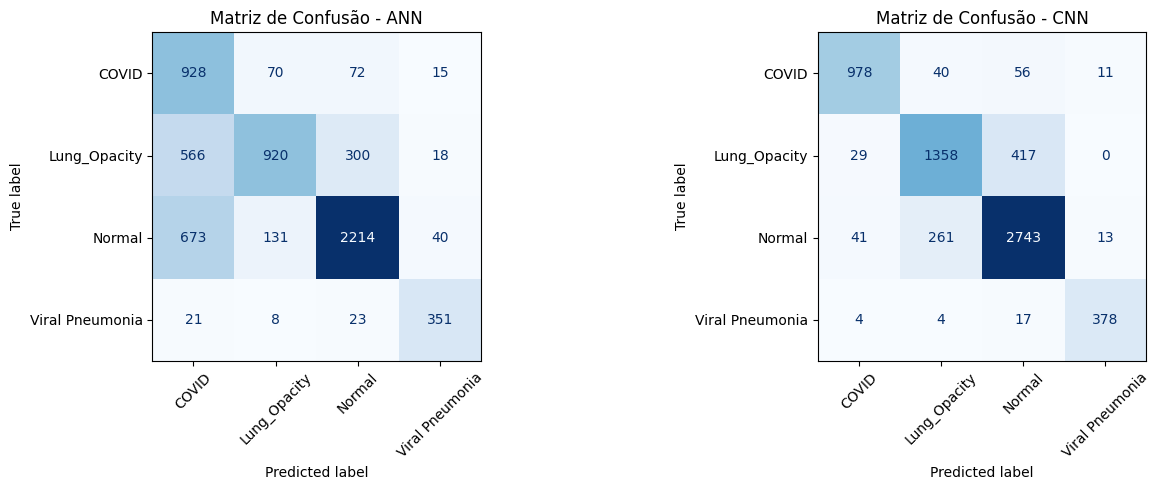

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ------- PREDIÇÕES CNN -------
y_prob_cnn = model.predict(test_gen)            # Probabilidades
y_pred_cnn = np.argmax(y_prob_cnn, axis=1)      # Classes previstas
y_true_cnn = test_gen.classes                   # Classes verdadeiras

class_names_cnn = list(test_gen.class_indices.keys())

# ------- MATRIZES DE CONFUSÃO -------
cm_ann = confusion_matrix(y_true_ann, y_pred_ann)
cm_cnn = confusion_matrix(y_true_cnn, y_pred_cnn)

# ------- GRÁFICOS LADO A LADO -------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ---- Gráfico 1: ANN ----
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_ann,
                               display_labels=class_names_ann)

disp1.plot(cmap="Blues", values_format='d',
           ax=axes[0], colorbar=False)

axes[0].set_title("Matriz de Confusão - ANN")
axes[0].tick_params(axis='x', rotation=45)

# ---- Gráfico 2: CNN ----
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_cnn,
                               display_labels=class_names_cnn)

disp2.plot(cmap="Blues", values_format='d',
           ax=axes[1], colorbar=False)

axes[1].set_title("Matriz de Confusão - CNN")
axes[1].tick_params(axis='x', rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()

### **Curva ROC**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# ------- BINARIZAÇÃO DAS CLASSES -------
y_true_bin = label_binarize(y_true_cnn, classes=range(len(class_names_cnn)))

# Dicionários para curvas
spec = dict()   # especificidade = 1 - FPR
tpr = dict()
roc_auc = dict()

# ------- CÁLCULO DAS CURVAS -------
for i in range(len(class_names_cnn)):
    fpr_i, tpr_i, _ = roc_curve(y_true_bin[:, i], y_prob_cnn[:, i])

    spec[i] = 1 - fpr_i       # transformar FPR -> especificidade
    tpr[i] = tpr_i

    # AUC deve ser calculado com fpr, tpr (correto matematicamente)
    roc_auc[i] = auc(fpr_i, tpr_i)

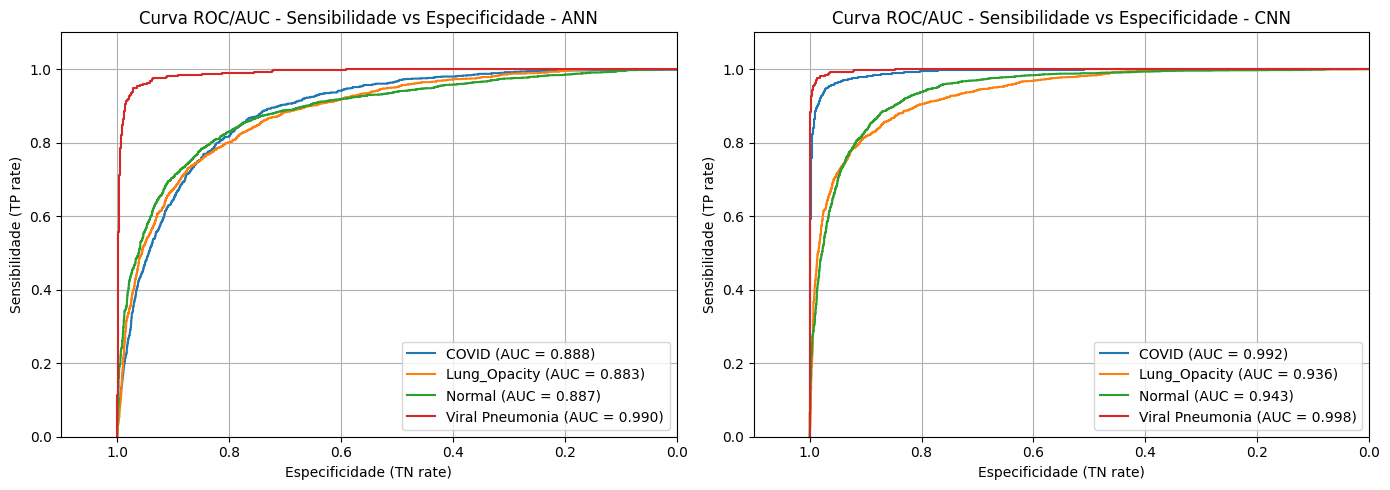

In [ ]:
import matplotlib.pyplot as plt

# Criar figura 1 linha × 2 colunas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ===========================================================
# ---------------------- GRÁFICO 1 — ANN ---------------------
# ===========================================================

for i in range(len(class_names_ann)):
    axes[0].plot(spec_ann[i], tpr_ann[i],
                 label=f"{class_names_ann[i]} (AUC = {roc_auc_ann[i]:.3f})")

axes[0].set_xlabel("Especificidade (TN rate)")
axes[0].set_ylabel("Sensibilidade (TP rate)")
axes[0].set_title("Curva ROC/AUC - Sensibilidade vs Especificidade - ANN")
axes[0].legend()
axes[0].grid(True)

# inverter eixo X — especificidade vai de 1 → 0
axes[0].invert_xaxis()
axes[0].set_xlim([1.1, 0])
axes[0].set_ylim([0, 1.1])


# ===========================================================
# ---------------------- GRÁFICO 2 — CNN ---------------------
# ===========================================================

for i in range(len(class_names_cnn)):
    axes[1].plot(spec[i], tpr[i],
                 label=f"{class_names_cnn[i]} (AUC = {roc_auc[i]:.3f})")

axes[1].set_xlabel("Especificidade (TN rate)")
axes[1].set_ylabel("Sensibilidade (TP rate)")
axes[1].set_title("Curva ROC/AUC - Sensibilidade vs Especificidade - CNN")
axes[1].legend()
axes[1].grid(True)

# inverter eixo X — especificidade vai de 1 → 0
axes[1].invert_xaxis()
axes[1].set_xlim([1.1, 0])
axes[1].set_ylim([0, 1.1])


# Ajustar layout
plt.tight_layout()
plt.show()